In [29]:
import pandas as pd 
lifeEx = pd.read_csv('Life-Expectancy-Data-Updated.csv')

In [30]:
print('SORTED DATAFRAME')
NLifeEx = lifeEx.sort_values(by = ['Country', 'Year'], ascending = [True, True], na_position = 'first')
NLifeEx

SORTED DATAFRAME


Country  Region  Year  Infant_deaths  Under_five_deaths  \
68    Afghanistan    Asia  2000           90.5              129.2   
1693  Afghanistan    Asia  2001           87.9              125.2   
679   Afghanistan    Asia  2002           85.3              121.1   
1221  Afghanistan    Asia  2003           82.7              116.9   
1147  Afghanistan    Asia  2004           80.0              112.6   
...           ...     ...   ...            ...                ...   
255      Zimbabwe  Africa  2011           50.8               80.8   
1489     Zimbabwe  Africa  2012           46.5               72.2   
1201     Zimbabwe  Africa  2013           44.8               66.3   
1005     Zimbabwe  Africa  2014           42.9               62.7   
1480     Zimbabwe  Africa  2015           42.1               61.3   

      Adult_mortality  Alcohol_consumption  Hepatitis_B  Measles   BMI  ...  \
68           310.8305                 0.02           62       12  21.7  ...   
1693         304.8580                 0.02           63       13  21.8  ...   
679          298.8855                 0.02           64       14  21.9  ...   
1221         292.0365                 0.02           65       15  22.0  ...   
1147         285.1880                 0.02           67       16  22.1  ...   
...               ...                  ...          ...      ...   ...  ...   
255          466.2650                 3.91           94       64  23.7  ...   
1489         423.4420                 3.93           97       64  23.7  ...   
1201         405.0080                 4.11           95       64  23.7  ...   
1005         386.5745                 4.22           91       64  23.8  ...   
1480         368.1410                 3.84           87       64  23.8  ...   

      Diphtheria  Incidents_HIV  GDP_per_capita  Population_mln  \
68            24           0.02             148           20.78   
1693          33           0.02             163           21.61   
679           36           0.02             320           22.60   
1221          41           0.02             332           23.68   
1147          50           0.02             323           24.73   
...          ...            ...             ...             ...   
255           93           6.05            1249           12.89   
1489          95           5.13            1432           13.12   
1201          95           4.77            1435           13.35   
1005          91           4.29            1444           13.59   
1480          87           3.86            1445           13.81   

      Thinness_ten_nineteen_years  Thinness_five_nine_years  Schooling  \
68                            2.3                       2.5        2.2   
1693                          2.1                       2.4        2.2   
679                          19.9                       2.2        2.3   
1221                         19.7                      19.9        2.4   
1147                         19.5                      19.7        2.5   
...                           ...                       ...        ...   
255                           6.8                       6.7        7.3   
1489                          6.5                       6.4        7.9   
1201                          6.2                       6.0        8.0   
1005                          5.9                       5.7        8.2   
1480                          5.6                       5.5        8.2   

      Economy_status_Developed  Economy_status_Developing  Life_expectancy  
68                           0                          1             55.8  
1693                         0                          1             56.3  
679                          0                          1             56.8  
1221                         0                          1             57.3  
1147                         0                          1             57.8  
...                        ...                        ...              ...  

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
#Checking for any NANS
NLifeEx.isnull().values.any()

False

<AxesSubplot:xlabel='Life_expectancy', ylabel='Count'>

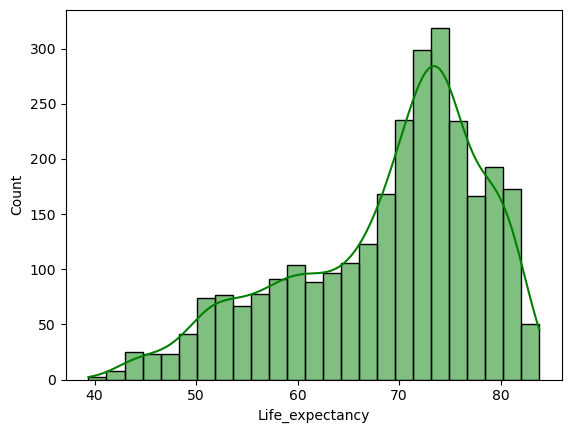

In [33]:
sns.histplot(NLifeEx['Life_expectancy'],kde = True, color='green')

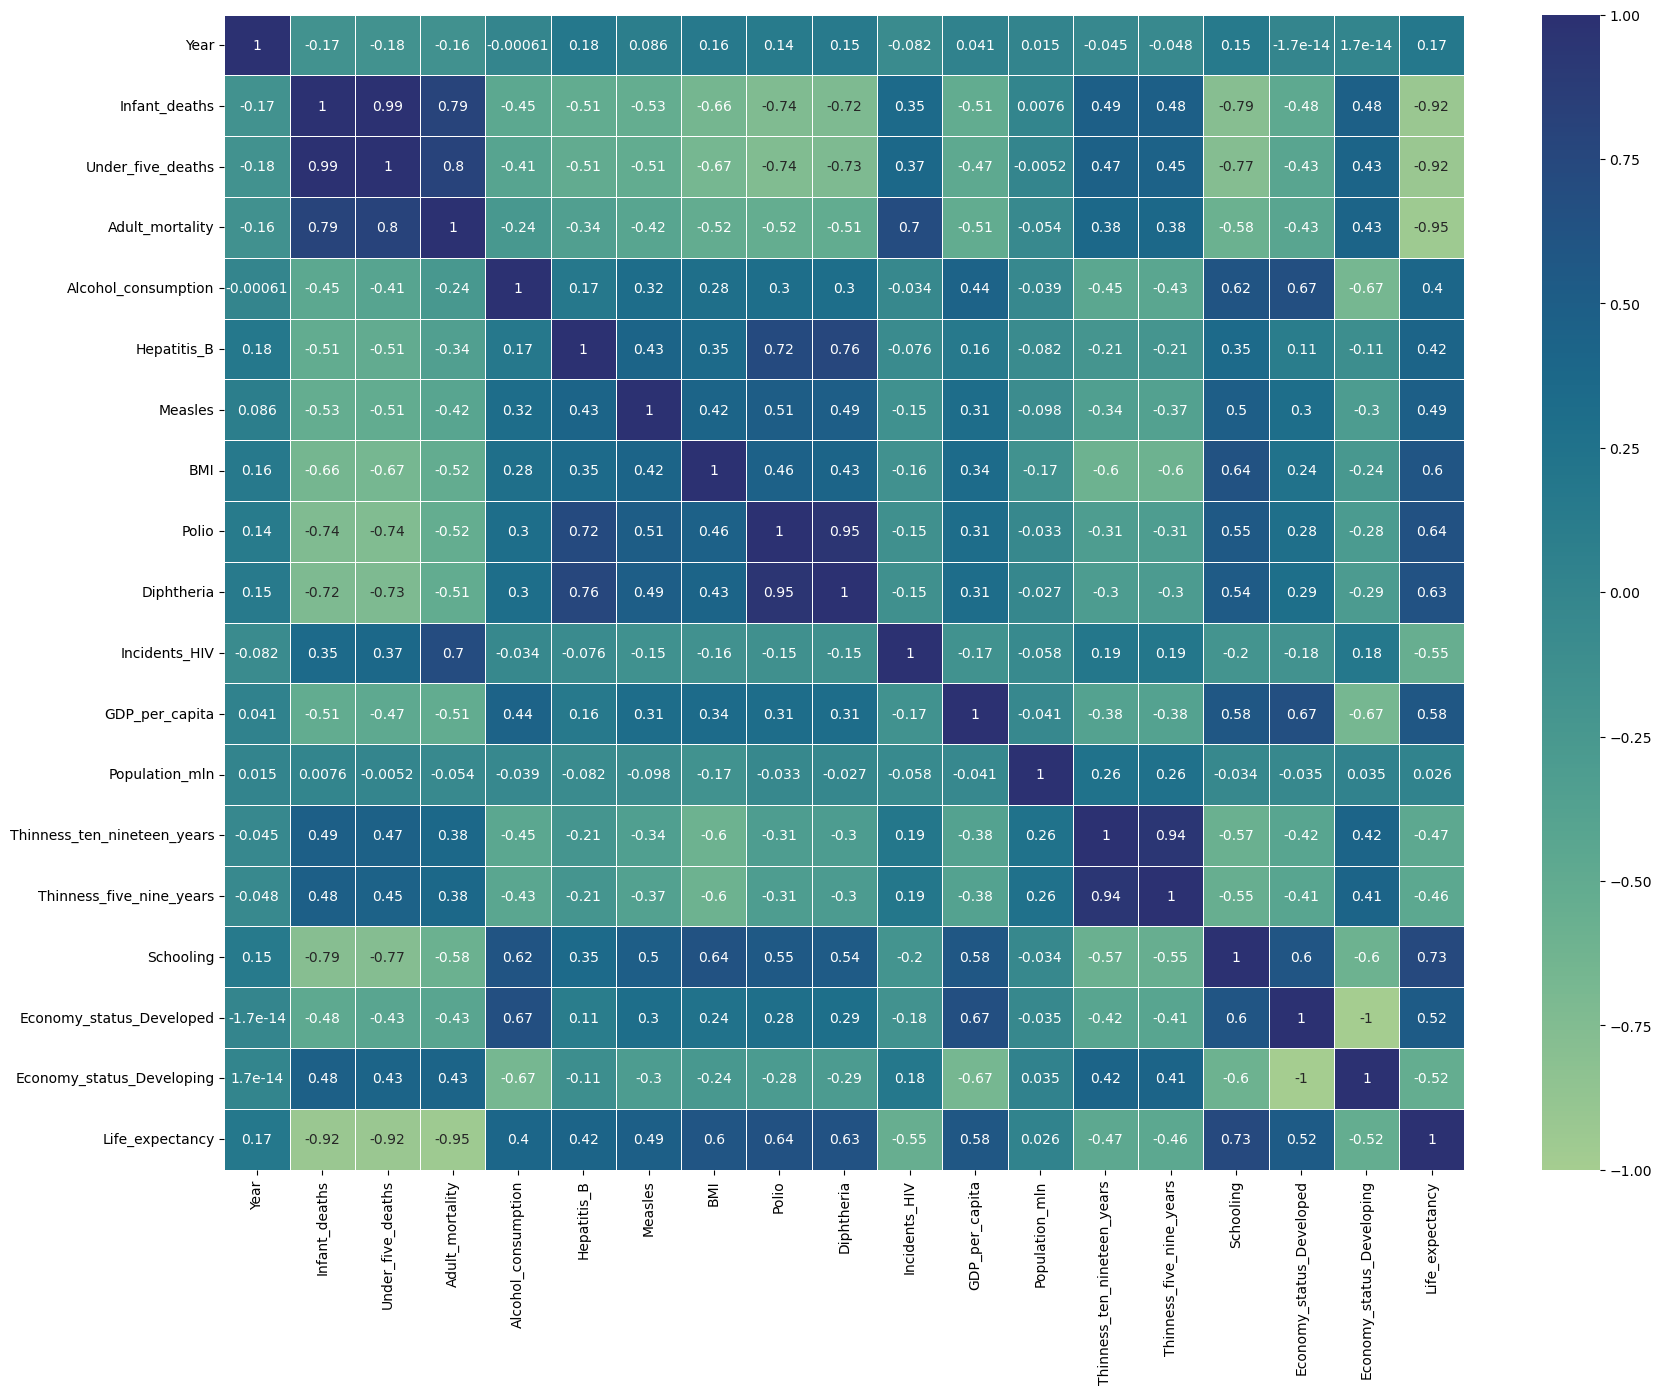

In [34]:
fig, ax = plt.subplots(figsize=(20,15))  
ax = sns.heatmap(NLifeEx.corr(), cmap="crest", annot=True, linewidth=.5)

In [35]:
Dropped=NLifeEx.drop('Region', axis= 1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier

# Regression testing using Linear, SGD, and Elastic

In [51]:
def plot_targets_against_preds(y, t_test):
    # TODO 5.2
    plt.plot(t_test, y, '.')

    # dashed diagonal line
    plt.plot([0,100], [0, 100], 'r--')
    # x and y axis range
    plt.xlim([10, 100])
    plt.ylim([10, 100])
    # x and y labels
    plt.xlabel("target")
    plt.ylabel("predicted")

The score:  0.9800760405864409
MAE: 1.052
ME: 0.980


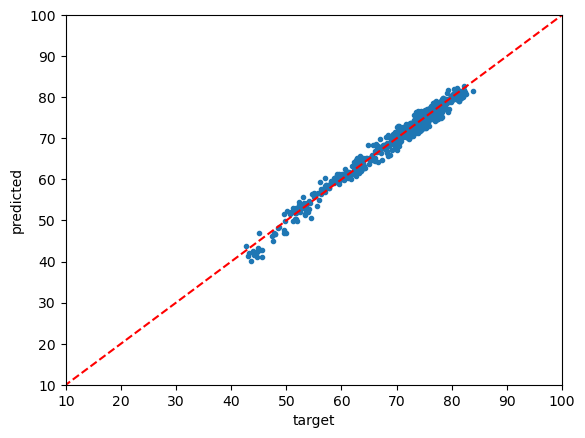

In [52]:
features = Dropped.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]
target = Dropped['Life_expectancy']

x_train, x_test, y_train, y_test = train_test_split(features, target,  test_size=0.2, random_state = 0)

model = LinearRegression()
model.fit(x_train, y_train)

yhat = model.predict(x_test)

score = model.score(x_test, y_test)
print("The score: ", score)

mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae) 

me = r2_score(y_test, yhat)
print('ME: %.3f' % me) 


plot_targets_against_preds(yhat, y_test)

The score:  -1.3745102360926451e+31
MAE: 20097585737651956.000
ME: -13745102360926451440872413200384.000


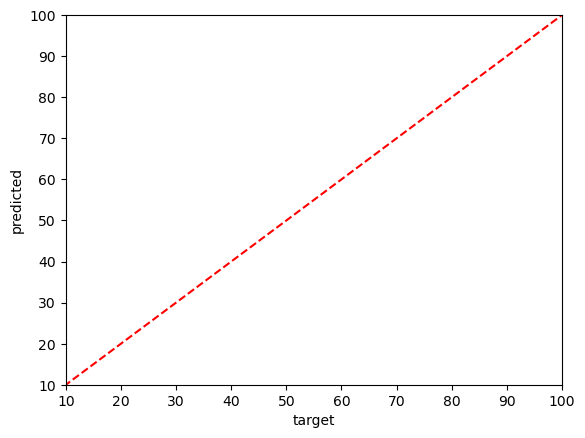

In [54]:
features = Dropped.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]
target = Dropped['Life_expectancy']

x_train, x_test, y_train, y_test = train_test_split(features, target,  test_size=0.2, random_state = 0)

model = linear_model.SGDRegressor(alpha=0.5)

model.fit(x_train, y_train)

yhat = model.predict(x_test)

score = model.score(x_test, y_test)
print("The score: ", score)

mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae) 

me = r2_score(y_test, yhat)
print('ME: %.3f' % me) 

plot_targets_against_preds(yhat, y_test)

The score:  0.980088228248206
MAE: 1.052
ME: 0.980


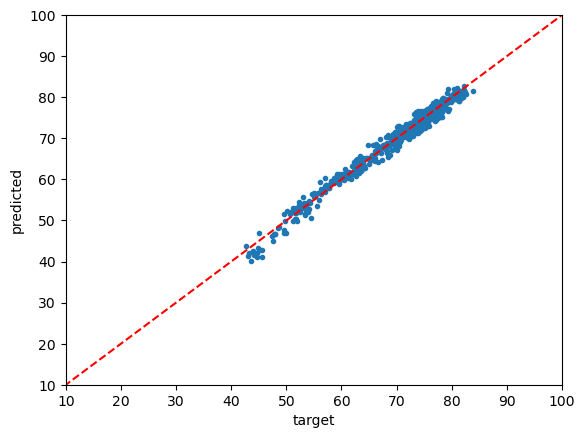

In [53]:
features = Dropped.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]
target = Dropped['Life_expectancy']

x_train, x_test, y_train, y_test = train_test_split(features, target,  test_size=0.2, random_state = 0)

model = linear_model.ElasticNet(alpha=0.01, l1_ratio=0.5)

model.fit(x_train, y_train)

yhat = model.predict(x_test)

score = model.score(x_test, y_test)
print("The score: ", score)

mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' % mae) 

me = r2_score(y_test, yhat)
print('ME: %.3f' % me) 

plot_targets_against_preds(yhat, y_test)

# Using Linear Classification testing (LogisticRegression and SVM)

=======================SVM========================


C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of ite

Train Accuracy: 0.29890219560878245
Test Accuracy: 0.21046511627906977


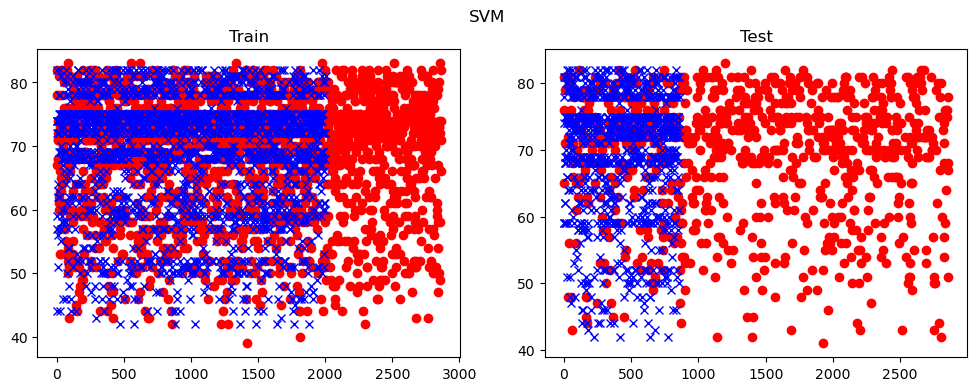

===================Logistic Reg===================


C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Ryan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Train Accuracy: 0.26596806387225547
Test Accuracy: 0.19534883720930232


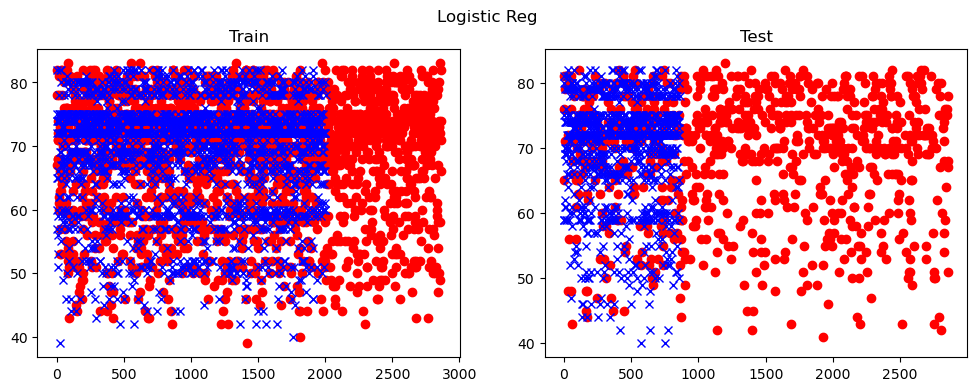

In [27]:
features = Dropped.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]
target = Dropped['Life_expectancy']
target=target.astype('int')

X_train, X_test, t_train, t_test = train_test_split(features, target,  test_size=0.3, random_state = 0)


svm = Pipeline([('scaler', StandardScaler()), 
                ('classifier', LinearSVC(tol=1e-3, random_state=0))])
logreg = LogisticRegression(random_state=0)
clfs = [svm, logreg]
names = ["SVM", "Logistic Reg"]


for name, clf in zip(names, clfs):
    print("{:=^50s}".format(name))
    
    clf = OneVsRestClassifier(clf)

    clf.fit(X_train, t_train)

    train_score = clf.score(X_train, t_train)

    test_score = clf.score(X_test, t_test)
   
    
    print(f"Train Accuracy: {train_score}\nTest Accuracy: {test_score}")
    
    y_train = clf.predict(X_train)
    
    y_test = clf.predict(X_test)
    
    plt.figure(figsize=(12,4))
    
    plt.subplot(121)
    plt.plot(t_train, 'ro')
    plt.plot(y_train, 'bx')
    plt.title("Train")
    
    plt.subplot(122)
    plt.plot(t_test, 'ro')
    plt.plot(y_test, 'bx')
    plt.title("Test")
    plt.suptitle(name)
    plt.show()

The regression performs far better than linear classification 

The next steps would be to try feature selection for regression and then try randomForest 